In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests, re

In [5]:
from wordcloud import WordCloud

In [6]:
from konlpy.tag import Okt
okt = Okt()

In [11]:
df_word = pd.read_excel('감성사전_편집.xlsx')
df_word.set_index('Unnamed: 0', drop=True, inplace=True)
std_df = pd.read_csv('./stopwords-ko.txt')

In [12]:
def novel_score_extract(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    text = soup.select('div.detail_view_content')[0].text
    text = ' '.join(re.compile('[ㄱ-ㅎ가-힣]+').findall(text))

    okt = Okt()
    okt_li = okt.morphs(text)
    globals()['word_li'] = [i for i in okt_li if len(i) >= 2]
    #word_li = [i for i in word_li if i not in std_df ]
    


    
    
    
    mood_count = {'슬픔': 0,
    '분노': 0,
    '기쁨': 0,
    '긴장감': 0,
    '무서운': 0,
    '증오': 0,
    '차분히': 0,
    '섹시': 0,
    '브릿락': 0,
    '설렘': 0,
    '몽환': 0}
    mood_words = {}

    for word in word_li:
        if word in df_word.index:
            word_mood = df_word.columns[df_word.loc[word, :] == 1].values[0]
            if word_mood in mood_words:
                mood_count[word_mood] += 1
                mood_words[word_mood].append(word)
            else:
                mood_count[word_mood] += 1
                mood_words[word_mood] =[word]
    for mood in mood_words.keys():
        mood_words[mood] = set(mood_words[mood])

    novel_score = list(mood_count.values())
    return novel_score

In [13]:
df_emotion = pd.read_csv('노래별감성점수_최종.csv')
emotion = df_emotion.drop(['Unnamed: 0', '노래', '가수'], axis=1)

In [15]:
del df_emotion['Unnamed: 0']

In [16]:
df_emotion

,노래,가수,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,사랑은 늘 도망가,임영웅,9,0,0,1,0,0,0,2,0,11,4
1,코 끝이 찡하게,차가을,8,0,1,0,0,0,0,0,1,4,1
2,혼자 사랑하고 미워해,백예슬,7,1,1,0,0,2,0,2,0,6,0
3,비 오는 날 듣기 좋은 노래 (Feat. Colde),에픽하이 (EPIK HIGH),19,2,5,2,0,3,1,1,0,5,0
4,Your Lights,이수 (엠씨더맥스),6,0,2,0,0,2,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Faded,Alan Walker,0,0,0,0,0,0,0,0,0,0,5
477,혼자라는 느낌,이상은 (=Lee-tzsche),5,0,0,2,0,1,0,4,0,2,7
478,재와 연기의 노래,못 (Mot),4,0,2,0,0,0,0,0,4,0,7
479,Scenery,Ashmute (애쉬뮤트),10,0,0,0,0,0,0,0,0,0,5


In [6]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

In [7]:
def search_similarity(a):
    similarity_li = []
    for i in range(len(emotion)):
        b = emotion.iloc[i, :].values
        similarity_li.append(cosine_similarity(a, b))
    song_score = df_emotion.iloc[np.argmax(similarity_li), 3:].values
    title = df_emotion.iloc[np.argmax(similarity_li), 1]
    singer = df_emotion.iloc[np.argmax(similarity_li), 2]
    return f"{singer} - {title}", song_score

In [8]:
# 로맨스 https://novel.naver.com/webnovel/detail?novelId=994958&volumeNo=2
# 판타지 https://novel.naver.com/webnovel/detail?novelId=1002530&volumeNo=102
# 무협 https://novel.naver.com/webnovel/detail?novelId=927909&volumeNo=114
# 미스터리 https://novel.naver.com/webnovel/detail?novelId=987046&volumeNo=84

In [9]:
url = 'https://novel.naver.com/webnovel/detail?novelId=987046&volumeNo=84'
novel_score = novel_score_extract(url)
music, song_score = search_similarity(novel_score)

In [10]:
music

'하성운 - LA LA POP!'

In [11]:
word_counts = {}
for i in word_li:
    if i in word_counts:
        word_counts[i] += 1
    else:
        word_counts[i] = 1

In [12]:
sorted(word_counts.items(), key = lambda item: item[1], reverse=True)

[('건일', 38),
 ('방수희', 24),
 ('으로', 16),
 ('했다', 11),
 ('골프', 11),
 ('이야', 11),
 ('내기', 10),
 ('머리카락', 10),
 ('드라이버', 10),
 ('조금', 8),
 ('장타', 7),
 ('좋아', 7),
 ('거야', 7),
 ('에서', 7),
 ('웃었다', 6),
 ('하는', 6),
 ('여자', 6),
 ('삭발', 6),
 ('검사', 6),
 ('있어', 5),
 ('어때', 5),
 ('있다', 5),
 ('표정', 5),
 ('생각', 5),
 ('친구', 5),
 ('그럼', 5),
 ('이다', 5),
 ('하지만', 5),
 ('윤해성', 5),
 ('그린', 5),
 ('스포츠', 4),
 ('하면', 4),
 ('먼저', 4),
 ('가지', 4),
 ('고개', 4),
 ('한테', 4),
 ('이기', 4),
 ('정도', 4),
 ('해서', 4),
 ('그런', 4),
 ('하지', 4),
 ('아냐', 4),
 ('머리', 4),
 ('이어', 4),
 ('유전자', 4),
 ('장유나', 4),
 ('남자', 4),
 ('소리', 4),
 ('야드', 4),
 ('그것', 3),
 ('좋지', 3),
 ('자신', 3),
 ('물론', 3),
 ('하고', 3),
 ('이야기', 3),
 ('웃음', 3),
 ('이었다', 3),
 ('조건', 3),
 ('역시', 3),
 ('이길', 3),
 ('있었다', 3),
 ('프로', 3),
 ('골퍼', 3),
 ('사람', 3),
 ('혹시', 3),
 ('유언', 3),
 ('묻은', 3),
 ('에는', 3),
 ('마지막', 3),
 ('위잉', 3),
 ('타석', 3),
 ('라도', 2),
 ('정말', 2),
 ('격투기', 2),
 ('어떤', 2),
 ('정보', 2),
 ('이미', 2),
 ('하더니', 2),
 ('하다가', 2),
 ('했지만', 2),
 ('관심', 2),


In [13]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] =False

In [14]:
bar_label = df_emotion.columns[3:].values
index = np.arange(len(bar_label))

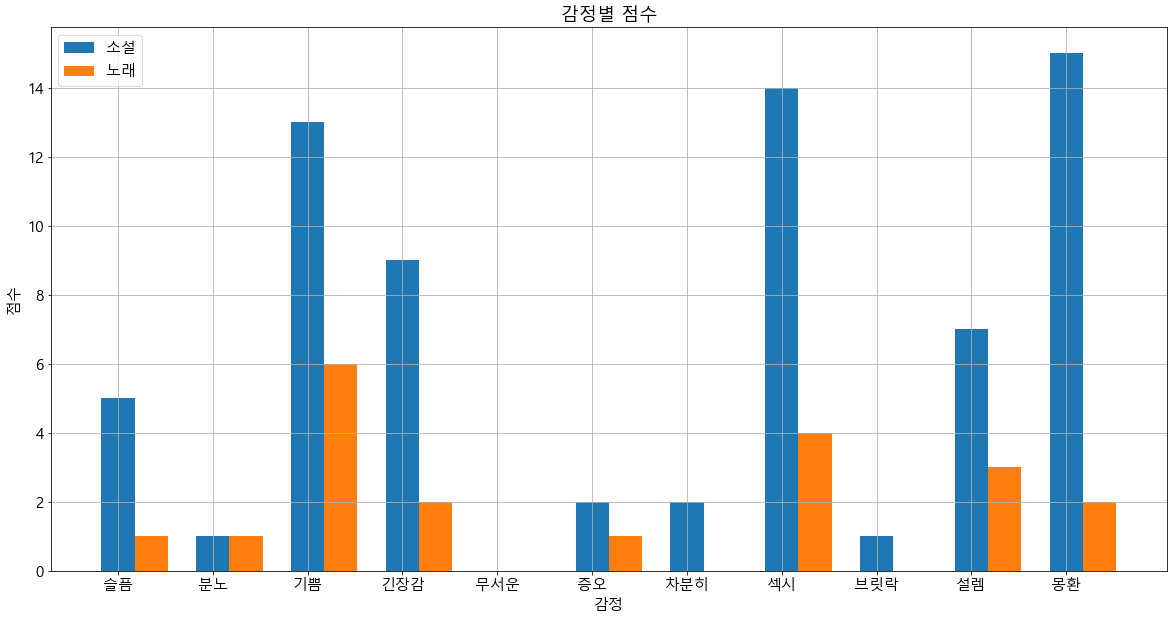

In [15]:
plt.figure(figsize=(20, 10))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

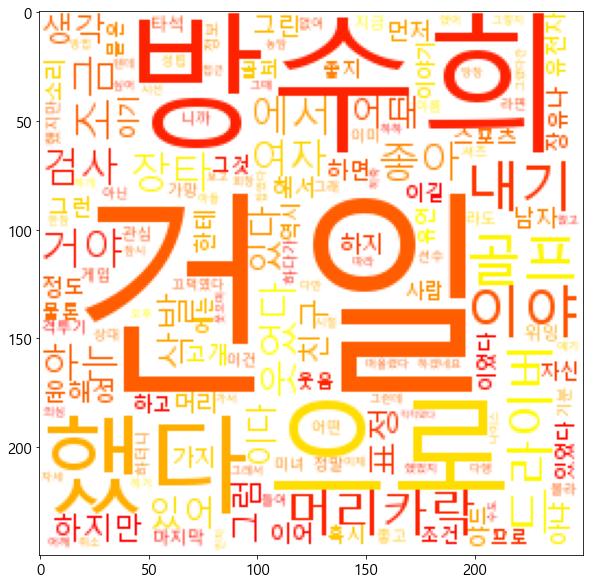

In [18]:
wc = WordCloud(background_color ='white', colormap='autumn', font_path='malgun', width=250, height=250, scale=1.0, max_font_size=100)
gen = wc.generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 10))
plt.imshow(gen)

In [9]:
ee = pd.read_csv('노래별감성점수_최종.csv')
ee

,Unnamed: 0,노래,가수,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,0,사랑은 늘 도망가,임영웅,9,0,0,1,0,0,0,2,0,11,4
1,1,코 끝이 찡하게,차가을,8,0,1,0,0,0,0,0,1,4,1
2,2,혼자 사랑하고 미워해,백예슬,7,1,1,0,0,2,0,2,0,6,0
3,3,비 오는 날 듣기 좋은 노래 (Feat. Colde),에픽하이 (EPIK HIGH),19,2,5,2,0,3,1,1,0,5,0
4,4,Your Lights,이수 (엠씨더맥스),6,0,2,0,0,2,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,476,Faded,Alan Walker,0,0,0,0,0,0,0,0,0,0,5
477,477,혼자라는 느낌,이상은 (=Lee-tzsche),5,0,0,2,0,1,0,4,0,2,7
478,478,재와 연기의 노래,못 (Mot),4,0,2,0,0,0,0,0,4,0,7
479,479,Scenery,Ashmute (애쉬뮤트),10,0,0,0,0,0,0,0,0,0,5


In [11]:
del ee['Unnamed: 0']

In [12]:
ee

,노래,가수,슬픔,분노,기쁨,긴장감,무서운,증오,차분히,섹시,브릿락,설렘,몽환
0,사랑은 늘 도망가,임영웅,9,0,0,1,0,0,0,2,0,11,4
1,코 끝이 찡하게,차가을,8,0,1,0,0,0,0,0,1,4,1
2,혼자 사랑하고 미워해,백예슬,7,1,1,0,0,2,0,2,0,6,0
3,비 오는 날 듣기 좋은 노래 (Feat. Colde),에픽하이 (EPIK HIGH),19,2,5,2,0,3,1,1,0,5,0
4,Your Lights,이수 (엠씨더맥스),6,0,2,0,0,2,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Faded,Alan Walker,0,0,0,0,0,0,0,0,0,0,5
477,혼자라는 느낌,이상은 (=Lee-tzsche),5,0,0,2,0,1,0,4,0,2,7
478,재와 연기의 노래,못 (Mot),4,0,2,0,0,0,0,0,4,0,7
479,Scenery,Ashmute (애쉬뮤트),10,0,0,0,0,0,0,0,0,0,5
